In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime as dt

In [3]:
# Carregar dados limpos
df = pd.read_csv('c:/Users/rafae/PIPELINE/projeto_pipeline/silver/twitter_sentment.csv')

print("="*50)
print("RELATÓRIO DE QUALIDADE DE DADOS")
print("="*50)


RELATÓRIO DE QUALIDADE DE DADOS


COMPLETUDE

In [4]:
total_celulas = df.shape[0] * df.shape[1]
celulas_preenchidas = df.count().sum()
completude_geral = (celulas_preenchidas / total_celulas) * 100

print(f"Completude Geral: {completude_geral:.2f}%")
print("\nCompletude por coluna:")

for coluna in df.columns:
    valores_preenchidos = df[coluna].count()
    total = len(df)
    percentual = (valores_preenchidos / total) * 100
    print(f" {coluna}: {percentual:.2f}%")


Completude Geral: 100.00%

Completude por coluna:
 indice: 100.00%
 user_id: 100.00%
 data: 100.00%
 consulta: 100.00%
 usuario: 100.00%
 @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D: 100.00%
 data_ingestao: 100.00%
 fonte_arquivo: 100.00%
 data_processamento: 100.00%


UNICIDADE

In [5]:
print("\n2. UNICIDADE DOS DADOS")
print("-" * 50)

duplicatas = df.duplicated().sum()
unicidade = ((len(df) - duplicatas) / len(df)) * 100
print(f"Linhas únicas: {unicidade:.2f}%")
print(f"Duplicatas encontradas: {duplicatas}")



2. UNICIDADE DOS DADOS
--------------------------------------------------
Linhas únicas: 100.00%
Duplicatas encontradas: 0


CONSISTÊNCIA

In [6]:
print("\n3. CONSISTÊNCIA DOS DADOS")
print("-" * 50)

# Exemplo: verificar se valores numéricos são positivos
for coluna in ['valor_total', 'quantidade']:
    if coluna in df.columns:
        negativos = (df[coluna] < 0).sum()
        print(f"{coluna}: {negativos} valores negativos encontrados")

# Exemplo: verificar se datas estão no passado
if 'data_compra' in df.columns:
    df['data_compra'] = pd.to_datetime(df['data_compra'])
    futuras = (df['data_compra'] > pd.Timestamp.now()).sum()
    print(f"Datas no futuro: {futuras}")




3. CONSISTÊNCIA DOS DADOS
--------------------------------------------------


VALIDADE

In [7]:
print("\n4. VALIDADE DOS DADOS")
print("-" * 50)

# Exemplo: verificar ranges válidos
if 'idade' in df.columns:
    fora_range = ((df['idade'] < 0) | (df['idade'] > 120)).sum()
    print(f"Idades inválidas: {fora_range}")



4. VALIDADE DOS DADOS
--------------------------------------------------


VISUALIZAÇÃO

/nGráfico de qualidade salvo em: data/quality_report.png


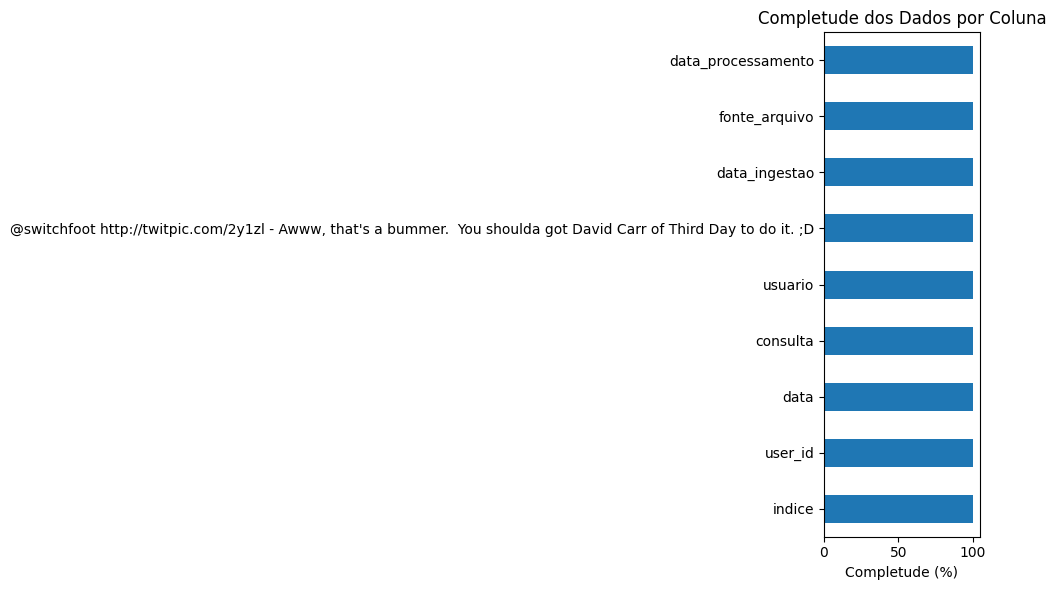

In [10]:
# Gráfico de completude
plt.figure(figsize=(10, 6))
completude_por_coluna = (df.count() / len(df) * 100).sort_values()
completude_por_coluna.plot(kind='barh')
plt.xlabel('Completude (%)')
plt.title('Completude dos Dados por Coluna')
plt.tight_layout()
plt.savefig('c:/Users/rafae/PIPELINE/projeto_pipeline/data_quality')
print("/nGráfico de qualidade salvo em: data/quality_report.png")


SCORE FINAL

In [11]:
print("\n" + "="*50)
print("SCORE GERAL DE QUALIDADE")
print("="*50)
# Score simples: média de completude e unicidade
score_final = (completude_geral + unicidade) / 2
print(f"Score Final: {score_final:.2f}%")

if score_final >= 90:
    print("Classificação: EXCELENTE")
elif score_final >= 80:
    print("Classificação: BOM")
elif score_final >= 70:
    print("Classificação: REGULAR")
else:
    print("Classificação: NECESSITA MELHORIAS")



SCORE GERAL DE QUALIDADE
Score Final: 100.00%
Classificação: EXCELENTE


In [9]:
import os
print(os.getcwd())

c:\Users\rafae\PIPELINE\projeto_pipeline
